# **Initial Load**

Authenticate with Google Drive and read in our dataset.

In [ ]:
# Install any required packages.
#!pip install -U -q PyDrive
!pip3 install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import any required libraries.
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [ ]:
# Authenticate with Google Drive.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download our dataset from Google Drive.
downloaded_file = drive.CreateFile({ 'id': '14RMV7CRXwwCt_9iLHenyQrB9GC5gYwul' }) 
downloaded_file.GetContentFile('ChicagoCrimeRecords.csv')  
chicago_crime_records = pd.read_csv('ChicagoCrimeRecords.csv')

In [ ]:
chicago_crime_records.iloc[0].to_csv("sample.csv")

# **Basic Checks**

Carry out some basic checks on our dataset.

In [ ]:
# Take a first glance at our dataset.
chicago_crime_records.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
# Basic stats
chicago_crime_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7724493 entries, 0 to 7724492
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
data.iloc[0].to_csv("sample.csv")

In [ ]:
chicago_crime_records.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.724493e+06,7.724493e+06,7.724446e+06,7.109646e+06,7.111017e+06,7.640383e+06,7.640383e+06,7.724493e+06,7.640383e+06,7.640383e+06
mean,6.980074e+06,1.186183e+03,1.129472e+01,2.275045e+01,3.749068e+01,1.164595e+06,1.885777e+06,2.009843e+03,4.184217e+01,-8.767151e+01
std,3.476114e+06,7.031026e+02,6.951593e+00,1.384904e+01,2.154067e+01,1.684921e+04,3.227926e+04,6.178600e+00,8.880713e-02,6.109028e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.764154e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152973e+06,1.859075e+06,2.005000e+03,4.176871e+01,-8.771369e+01
50%,6.984250e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166101e+06,1.890722e+06,2.009000e+03,4.185589e+01,-8.766586e+01
75%,1.005412e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176368e+06,1.909270e+06,2.015000e+03,4.190677e+01,-8.762820e+01
max,1.296785e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.023000e+03,4.202291e+01,-8.752453e+01


Beat


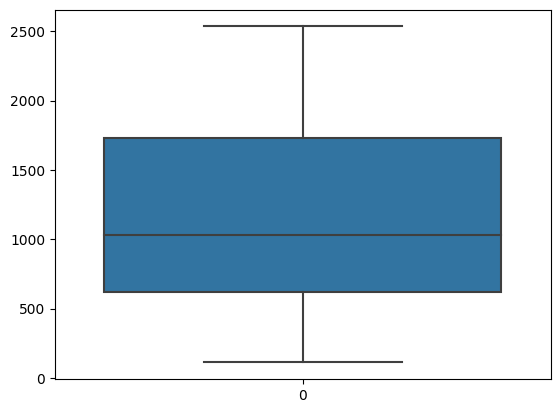

District


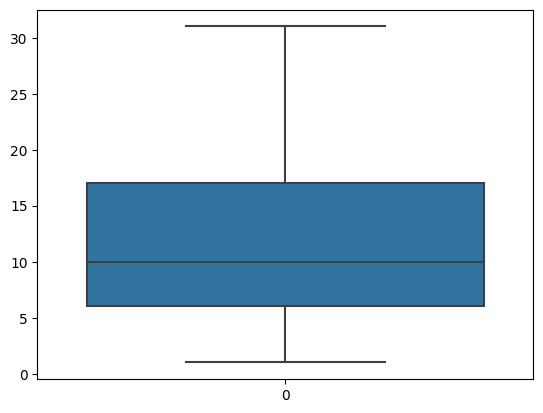

Community Area


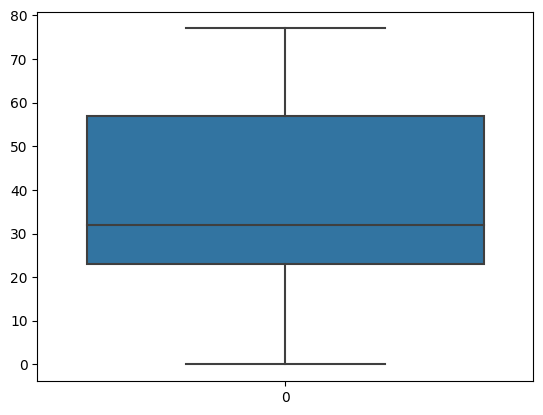

X Coordinate


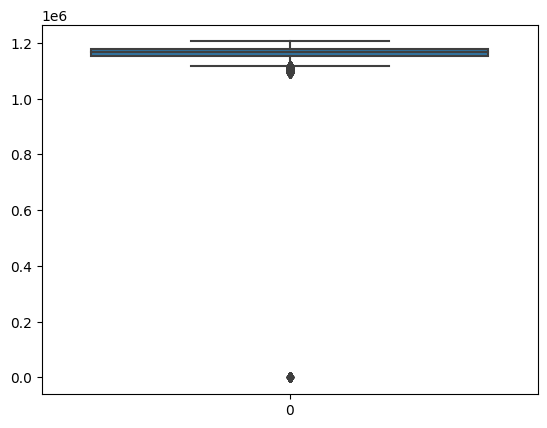

Y Coordinate


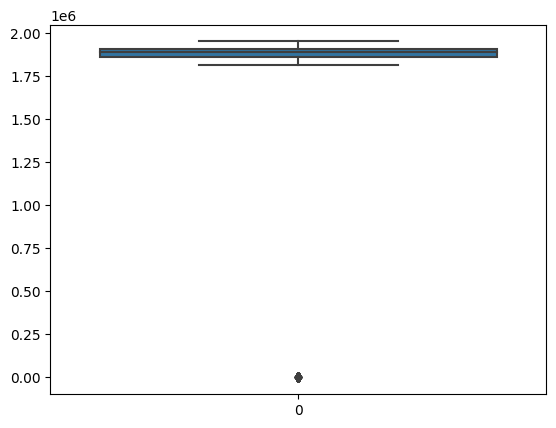

Year


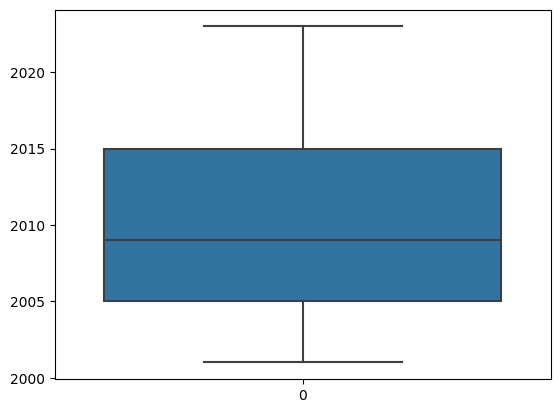

Latitude


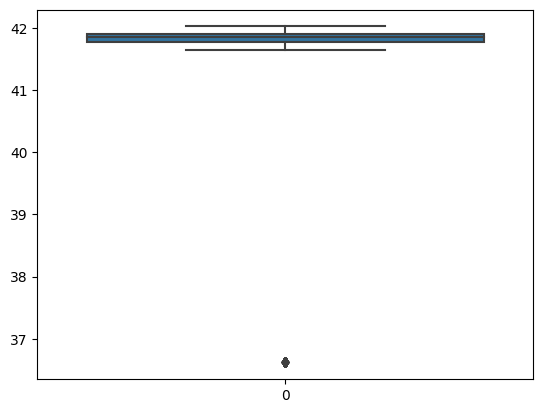

Longitude


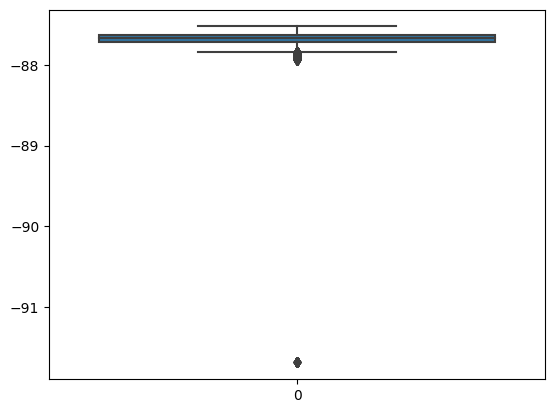

In [ ]:
for column in ['Beat', 'District', 'Community Area','X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']: 
  print(column)
  sns.boxplot(chicago_crime_records[column])
  plt.show()

In [ ]:
chicago_crime_records.loc[chicago_crime_records.Latitude < 37].head(22)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
209636,1051,G526151,09/03/2001 09:00:00 PM,030XX S CALIFORNIA,0110,HOMICIDE,FIRST DEGREE MURDER,COUNTY JAIL,True,False,...,NaN,NaN,01A,0.0,0.0,2001,08/17/2015 03:03:40 PM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
1046781,1206,G678530,11/11/2001 12:45:00 AM,033XX W FULTON AV `,0110,HOMICIDE,FIRST DEGREE MURDER,VACANT LOT,False,False,...,NaN,NaN,01A,0.0,0.0,2001,08/17/2015 03:03:40 PM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4264279,6063108,HP152583,01/30/2008 10:45:00 PM,035XX S DAN RYAN LOCAL OB,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,CTA TRAIN,False,False,...,3.0,34.0,03,0.0,0.0,2008,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4298070,6125233,HP213212,02/15/2008 01:48:00 PM,005XX N BESSIE COLEMAN DR,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,AIRPORT/AIRCRAFT,False,False,...,41.0,76.0,11,0.0,0.0,2008,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4347069,6200282,HP285052,04/12/2008 01:45:00 AM,020XX W NORTH AVE,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,32.0,24.0,06,0.0,0.0,2008,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4379099,11732417,JC318144,06/23/2019 09:03:00 AM,009XX N CHRISTIANA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,True,...,27.0,23.0,08B,0.0,0.0,2019,06/30/2019 04:13:20 PM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4395651,6169464,HP247247,03/26/2008 04:00:00 AM,020XX W NORTH AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,32.0,24.0,02,0.0,0.0,2008,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4433589,6229358,HP315970,05/04/2008 01:55:00 AM,006XX N KENNEDY EXPY OB,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,HIGHWAY/EXPRESSWAY,True,False,...,27.0,24.0,15,0.0,0.0,2008,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4452719,6412595,HP492195,08/03/2008 07:04:00 PM,020XX W NORTH AVE,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,32.0,24.0,08B,0.0,0.0,2008,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446395, -91.686565684)"
4538902,6380603,HP457899,07/17/2008 12:04:00 PM,039XX W POTOMAC AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,27.0,23.0,24,0.0,0.0,2008,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446395, -91.686565684)"


In [ ]:
# Are they the same ?
latitude_outliers = chicago_crime_records.loc[chicago_crime_records.Latitude < 37]["ID"]
longitude_outliers = chicago_crime_records.loc[chicago_crime_records.Longitude < -91]["ID"]
X_coor_outliers = chicago_crime_records.loc[chicago_crime_records["X Coordinate"] < 0.2]["ID"]
Y_coor_outliers = chicago_crime_records.loc[chicago_crime_records["Y Coordinate"] < 0.2]["ID"]

In [ ]:
outliers = [latitude_outliers, longitude_outliers, X_coor_outliers, Y_coor_outliers]

In [ ]:
for o in outliers: print(len(o))

118
118
118
118


In [ ]:
print(sum(latitude_outliers == longitude_outliers))
print(sum(X_coor_outliers == Y_coor_outliers))
print(sum(longitude_outliers == X_coor_outliers))

118
118
118


In [ ]:
outliers_idx = latitude_outliers.index

In [ ]:
missing_rows = chicago_crime_records[chicago_crime_records.isnull().any(axis=1)]

<Axes: >

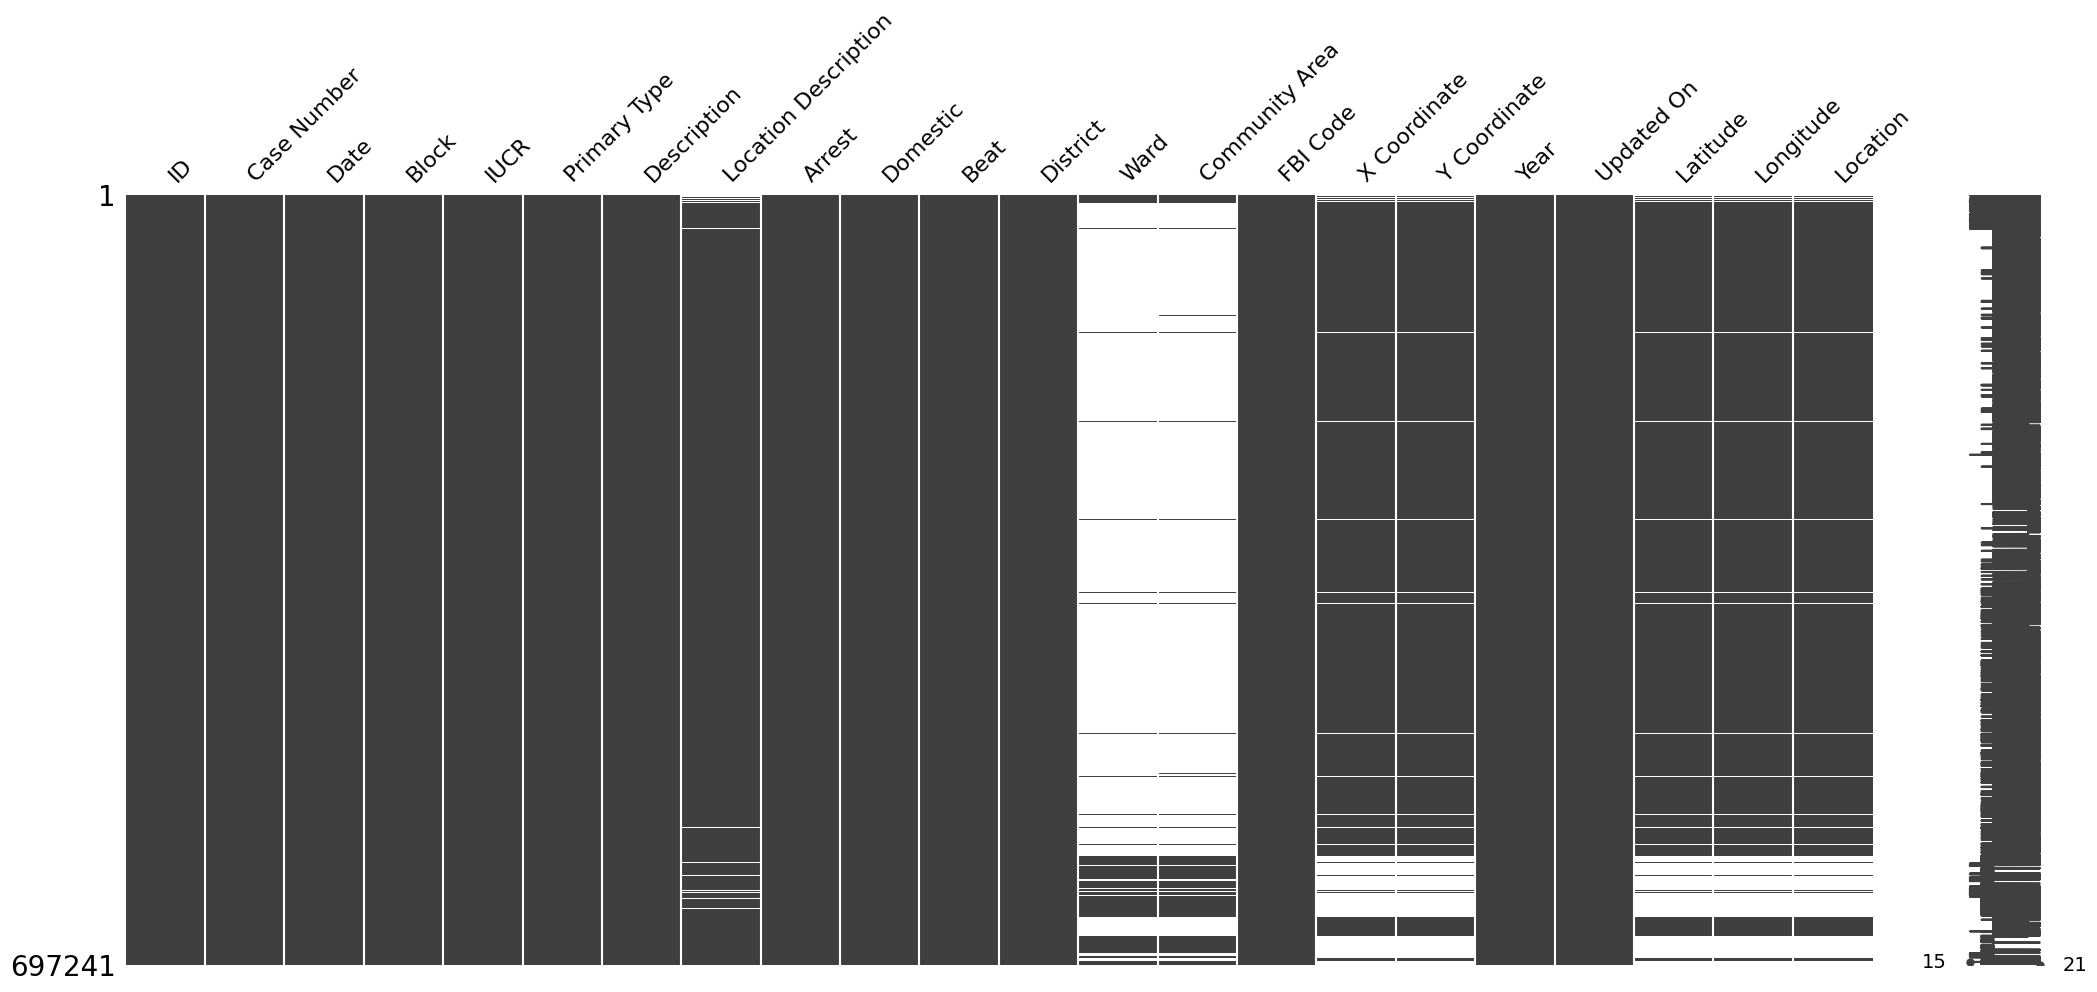

In [ ]:
missingno.matrix(missing_rows)

In [ ]:
outliers = chicago_crime_records.iloc[outliers_idx]

<Axes: >

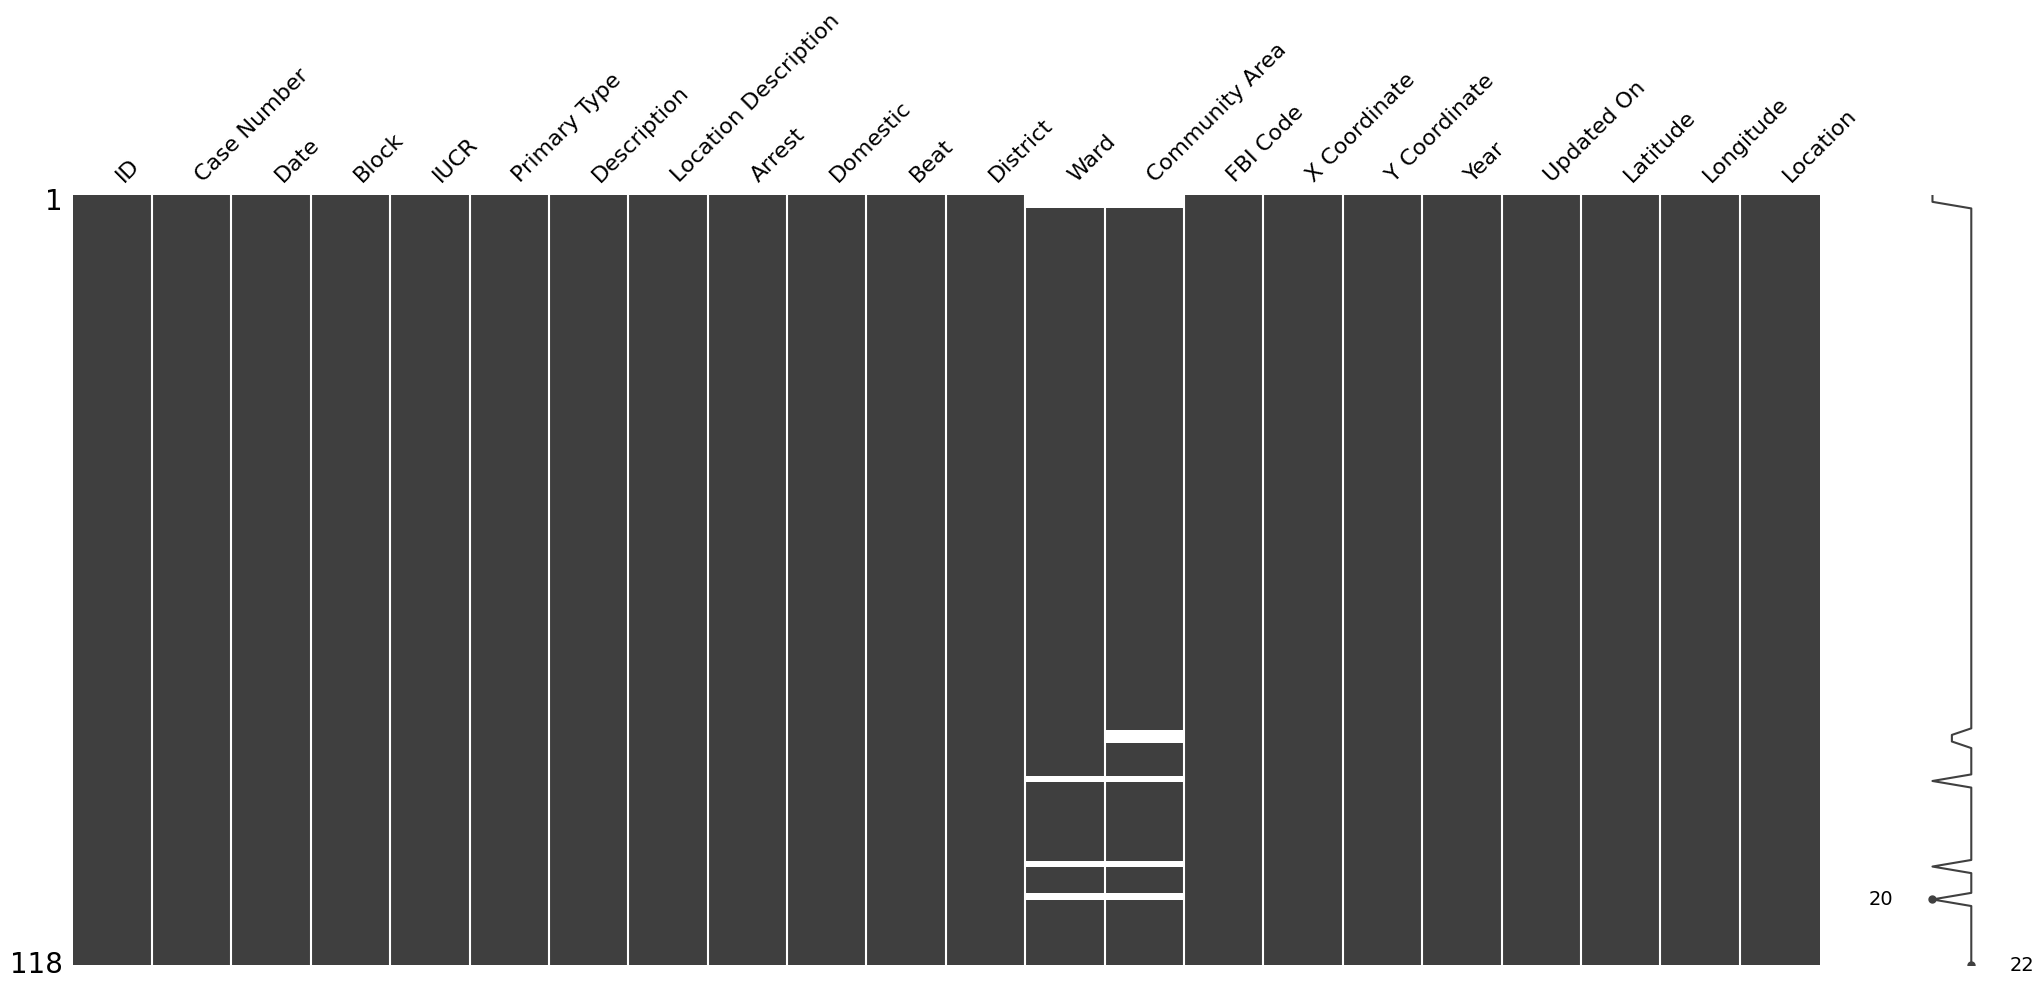

In [ ]:
missingno.matrix(outliers)

In [ ]:
ouliers["ID"].drop_duplicates()

209636         1051
1046781        1206
4264279     6063108
4298070     6125233
4347069     6200282
             ...   
7465830     8423522
7465973     8636118
7471687     6393736
7473413     9189660
7698998    12852880
Name: ID, Length: 118, dtype: int64

<Axes: xlabel='Primary Type'>

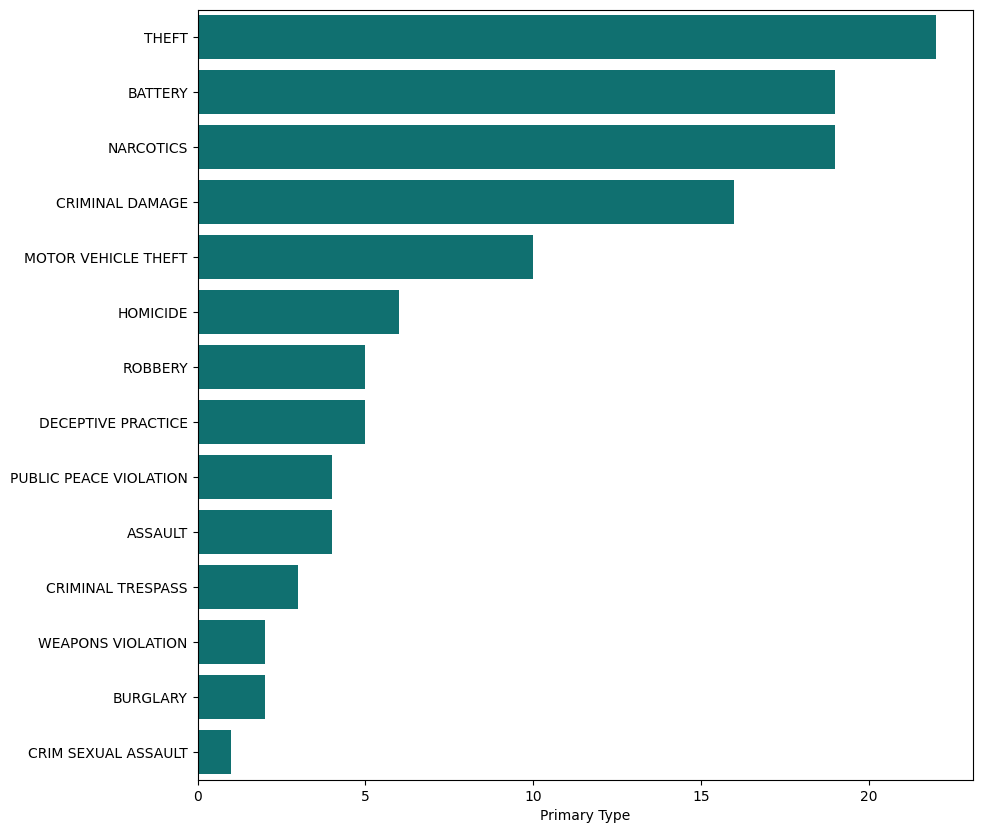

In [ ]:
outlier_pt = outliers["Primary Type"].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
ax.ticklabel_format(style='plain')
sns.barplot(x=outlier_pt, y=outlier_pt.index, ax=ax, color="teal")

In [ ]:
ouliers_location_features = ["X Coordinate", "Y Coordinate", "Latitude", "Longitude"]
ol = outliers[ouliers_location_features]
ol["count"] = 1
ol.groupby(ouliers_location_features).count()

<ipython-input-66-a004e953a385>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol["count"] = 1


,,,,count
X Coordinate,Y Coordinate,Latitude,Longitude,
0.0,0.0,36.619446,-91.686566,118


In [ ]:
# Determine all of the unique types of crimes present in our dataset.
np.sort(chicago_crime_records['Primary Type'].unique())

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [ ]:
# Determine the frequency of each crime type.
chicago_crime_records['Primary Type'].value_counts()

THEFT                                1629649
BATTERY                              1413169
CRIMINAL DAMAGE                       880818
NARCOTICS                             745800
ASSAULT                               502289
OTHER OFFENSE                         479712
BURGLARY                              422713
MOTOR VEHICLE THEFT                   368718
DECEPTIVE PRACTICE                    340108
ROBBERY                               290346
CRIMINAL TRESPASS                     213129
WEAPONS VIOLATION                     104462
PROSTITUTION                           69803
OFFENSE INVOLVING CHILDREN             55127
PUBLIC PEACE VIOLATION                 52120
SEX OFFENSE                            30322
CRIM SEXUAL ASSAULT                    27672
INTERFERENCE WITH PUBLIC OFFICER       18227
LIQUOR LAW VIOLATION                   14859
GAMBLING                               14617
ARSON                                  13157
HOMICIDE                               12421
KIDNAPPING

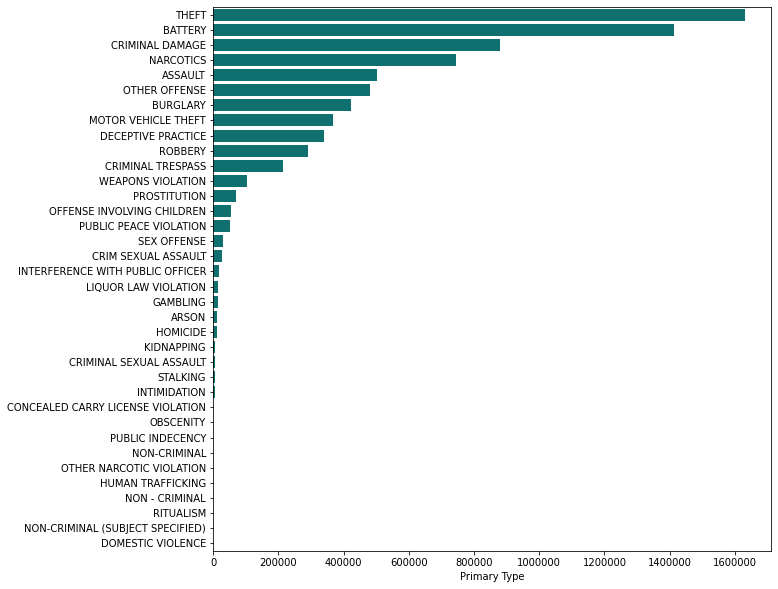

In [ ]:
vc = chicago_crime_records['Primary Type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
ax.ticklabel_format(style='plain')
sns.barplot(x=vc, y=vc.index, ax=ax, color="teal")

<ipython-input-31-445655d8a53d>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vc_2 = vc_2.append(pd.Series([other_count], index=[f"REMAINING {len(vc[first_x:])} CRIME TYPES"]))


<Axes: title={'center': 'A Ranking of the Types of Crime that Occur in Chicago'}, xlabel='Occurrences'>

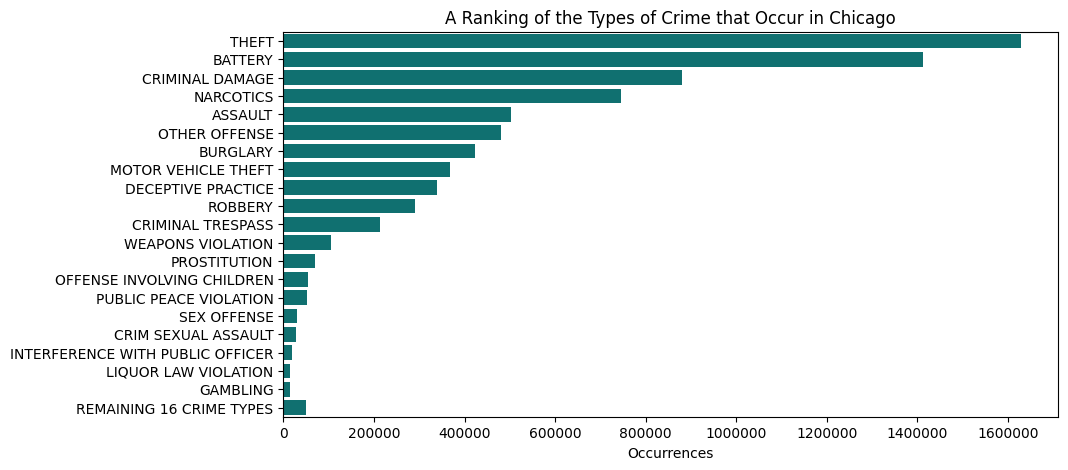

In [ ]:
vc = chicago_crime_records['Primary Type'].value_counts()
first_x = 20
vc_2 = vc[:first_x]
other_count = sum(vc[first_x:])
vc_2 = vc_2.append(pd.Series([other_count], index=[f"REMAINING {len(vc[first_x:])} CRIME TYPES"]))

fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
ax.set(title="A Ranking of the Types of Crime that Occur in Chicago", xlabel="Occurrences")
sns.barplot(x=vc_2, y=vc_2.index, ax=ax, color="teal")


16

In [ ]:
# Determine whether or not the crime rate has risen or fallen in recent years.
chicago_crime_records['Year'].value_counts()

2002    486799
2001    485865
2003    475979
2004    469418
2005    453767
2006    448172
2007    437080
2008    427160
2009    392816
2010    370490
2011    351957
2012    336251
2013    307451
2014    275720
2016    269768
2017    269032
2018    268730
2015    264731
2019    261190
2022    236462
2020    212008
2021    208332
2023     15315
Name: Year, dtype: int64